In [1]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np 
import pandas as pd

In [3]:
import os
import re 

files = {os.path.splitext(k)[0]: {} for k in os.listdir('../Practica3/data') if 'acero' in os.path.splitext(k)[0] or 'laton' in os.path.splitext(k)[0]}


for i,file in enumerate(os.listdir('../Practica3/data')):
    name = os.path.splitext(file)[0]
    if 'acero' in name or 'laton' in name:
        f = open(f'../Practica3/data/{file}').read().split()[7:]
        t = [float(f[i]) for i in range(0,len(f),2)]
        v = [float(f[i + 1]) for i in range(0,len(f),2)]
        files[name]['t'] = np.array(t)
        files[name]['v'] = np.array(v)

  

### Acero 3

In [9]:
t = files['acero_3']['t'][1000:]
v = files['acero_3']['v'][1000:]
dt = files['acero_3']['t'][1]
# arreglo un poco
v = v - np.median(v) #corro el 0
t= np.linspace(0, len(t)/1000, len(t))

Text(0, 0.5, 'Signal [V]')

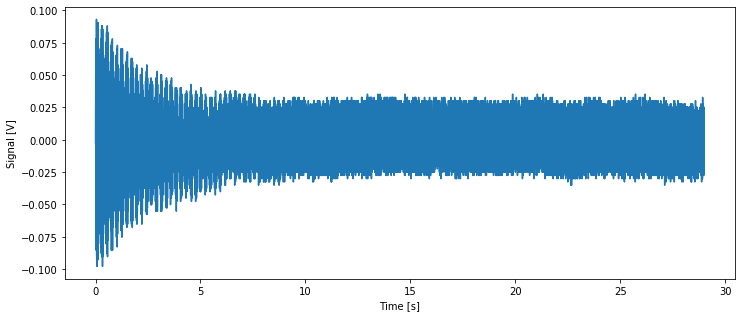

In [8]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure(figsize = (12,5))
plt.clf()
plt.plot(t,v)
plt.xlabel("Time [s]")
plt.ylabel("Signal [V]")

Primero vemos qué tipo de ruido es (blanco, rosa), para ver cómo aproximar la frecuencias de modulación

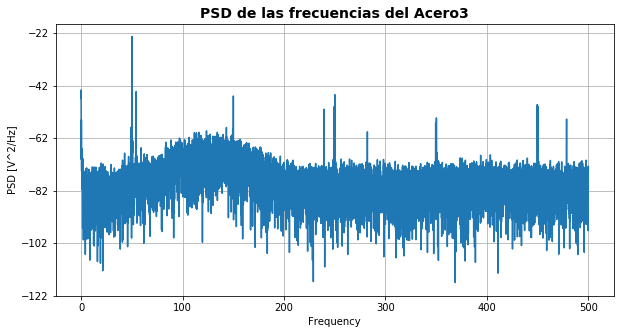

In [17]:
plt.figure(figsize = (10,5))
plt.psd(np.array(v),len(v), 1/dt)
plt.ylabel('PSD [V^2/Hz]')
plt.xlabel('Frequency')
plt.title('PSD de las frecuencias del Acero3',fontsize = 14, fontweight ='bold')
plt.show()

Dos métodos distintos de PSD. PROBARLOS

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.bessel.html